In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# Total population, N.
N = 18000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2583, 1./14 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

In [3]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [4]:
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

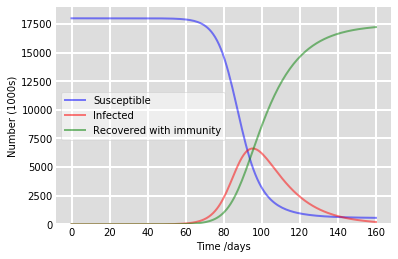

In [5]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,19000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [6]:
def sird_model(y, t, N, beta, delta, zeta):
    """
    SIR model that takes into account the number of deaths.
    """
    S, I, R, D = y / N
    S_prime = - beta * S * I
    I_prime = beta * S * I - zeta * I - delta * I
    R_prime = zeta * I
    D_prime = delta * I
    return S_prime * N, I_prime * N, R_prime * N, D_prime * N

In [7]:
# Total population, N.
N = 18000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0, D0 = 1, 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 - D0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, delta, zeta = 2.778734e-01, 0.0195652, 1./14 # A grid of time points (in days)
t = np.linspace(0, 160, 160)

In [8]:
# Initial conditions vector
y0 = S0, I0, R0, D0
# Integrate the SIR equations over the time grid, t.
ret = odeint(sird_model, y0, t, args=(N, beta, delta, zeta))
S, I, R, D = ret.T

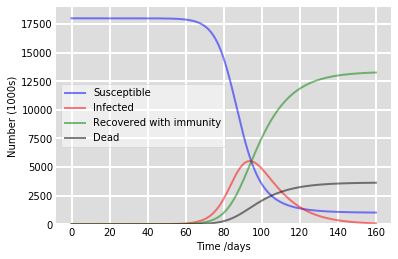

In [9]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, D/1000, 'black', alpha=0.5, lw=2, label='Dead')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,19000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [10]:
def seirdq_model(y, t, N, alpha, beta, gamma, omega, zeta, delta):
    """
    A modified SEIRD model in order to take into account quarantine.
    """
    S, E, I, R, D = y / N
    S_prime = - beta * S * I - gamma * E * S - omega * S
    E_prime = beta * S * I - alpha * E + gamma * E * S - omega * E
    I_prime = alpha * E - zeta * I - delta * I - omega * I
    R_prime = zeta * I + omega * (S + E + I)
    D_prime = delta * I
    return S_prime * N, E_prime * N, I_prime * N, R_prime * N, D_prime * N

In [11]:
# Total population, N.
N = 18000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, E0, R0, D0 = 1, 1, 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - E0 - R0 - D0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
alpha, beta, gamma, omega, zeta, delta = 0.25, 8.738779e-01, 0.000110601, 0.02143, 0.071429, 0.011305 # A grid of time points (in days)
t = np.linspace(0, 160, 160)

In [12]:
# Initial conditions vector
y0 = S0, E0, I0, R0, D0
# Integrate the SIR equations over the time grid, t.
ret = odeint(seirdq_model, y0, t, args=(N, alpha, beta, gamma, omega, zeta, delta))
S, E, I, R, D = ret.T

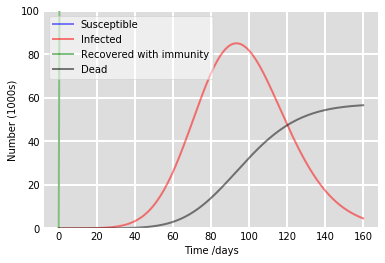

In [13]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, D/1000, 'black', alpha=0.5, lw=2, label='Dead')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,100)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()